# Workbook for working thru the Data Science Pipeline

**Plan** > Acquire > Prepare > Model > Deliver

**What is driving telco customers to churn?**
- Target variable is Churn ==> Categorical

- Are there features that make a customer more likely to churn or not churn?
    - Null Hypothesis: Features have no predictive value over whether a customer churns or not. 
    - Alt Hypothesis: Certain features can help predict whether a customer will churn or not. 
    
- Goal 1: Identify predictve features (if any) and build a model for predicting churn at Telco
 
- Goal 2: Propose reccomendations for reducing churn based upon analysis

In [34]:
#Imports

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#standard imports
import numpy as np
import pandas as pd
import os

#visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier

#env & modules
from env import host, user, password
import acquire
import prepare
import explore

In [24]:
#define get_connection to be used in acquire.py file 
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the CodeUp db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [25]:
#define acquire telco data function
def get_telco_data():
    '''
    This function reads in telco data from Codeup database and writes data to
    a csv file, returns df.
    '''
  # filename = 'telco.csv'
  # if os.path.isfile(filename):
  #     return pd.read_csv(filename)
  # else:
  #     # Read fresh data from db into a DataFrame.
    df = pd.read_sql('''
            SELECT *
FROM customers
JOIN internet_service_types USING (internet_service_type_id)
JOIN contract_types USING(contract_type_id)
JOIN payment_types USING (payment_type_id);
            ''', 
            get_connection('telco_churn'))
        
        # Write DataFrame to a csv file.
       # df.to_csv(filename)
          
    return df

In [16]:
telco = get_telco_data()

In [17]:
telco.tail()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
7038,4,3,3,9950-MTGYX,Male,0,Yes,Yes,28,Yes,...,No internet service,No internet service,No internet service,Yes,20.30,487.95,No,None,Two year,Credit card (automatic)
7039,2,3,3,9953-ZMKSM,Male,0,No,No,63,Yes,...,No internet service,No internet service,No internet service,No,25.25,1559.3,No,None,Two year,Mailed check
7040,4,3,3,9964-WBQDJ,Female,0,Yes,No,71,Yes,...,No internet service,No internet service,No internet service,Yes,24.40,1725.4,No,None,Two year,Credit card (automatic)
7041,3,3,3,9972-EWRJS,Female,0,Yes,Yes,67,Yes,...,No internet service,No internet service,No internet service,Yes,19.25,1372.9,No,None,Two year,Bank transfer (automatic)
7042,4,3,3,9975-GPKZU,Male,0,Yes,Yes,46,Yes,...,No internet service,No internet service,No internet service,No,19.75,856.5,No,None,Two year,Credit card (automatic)


In [18]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [20]:
telco.internet_service_type.value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
None           0.216669
Name: internet_service_type, dtype: float64

In [21]:
telco.contract_type.value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: contract_type, dtype: float64

In [22]:
telco.payment_type.value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: payment_type, dtype: float64

In [48]:
telco.total_charges = telco.total_charges.replace(' ', 0.0)
telco.total_charges = telco.total_charges.astype('float64')

In [49]:
telco['total_charges'].replace(0,telco['monthly_charges'],inplace=True)



ValueError: Series.replace cannot use dict-value and non-None to_replace

In [98]:

telco['total_charges_1'] = telco.total_charges.apply(lambda n: n if n > 0 else n.replace(telco.monthly_charges[n]))

AttributeError: 'float' object has no attribute 'replace'

In [96]:
telco.tail()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,monthly_charges,total_charges,churn,internet_service_type_id.1,internet_service_type,contract_type_id.1,contract_type,payment_type_id.1,payment_type,total_charges_1
253543,253543,9995-HOTOH,Male,0,Yes,Yes,63,No,No phone service,1,...,59.0,3707.6,No,2,Fiber optic,2,One year,4,Credit card (automatic),3707.6
253544,253544,9995-HOTOH,Male,0,Yes,Yes,63,No,No phone service,1,...,59.0,3707.6,No,3,None,2,One year,4,Credit card (automatic),3707.6
253545,253545,9995-HOTOH,Male,0,Yes,Yes,63,No,No phone service,1,...,59.0,3707.6,No,1,DSL,3,Two year,4,Credit card (automatic),3707.6
253546,253546,9995-HOTOH,Male,0,Yes,Yes,63,No,No phone service,1,...,59.0,3707.6,No,2,Fiber optic,3,Two year,4,Credit card (automatic),3707.6
253547,253547,9995-HOTOH,Male,0,Yes,Yes,63,No,No phone service,1,...,59.0,3707.6,No,3,None,3,Two year,4,Credit card (automatic),3707.6


In [101]:
def update_total_charges(df):
    for n in df.total_charges:
        if n == 0:
            data.replace({
            'total_charges': {
        '0: 'monthly_charges'
                        }
                        })
        else:
            n == n
    return df

SyntaxError: invalid syntax (<ipython-input-101-85d878c3feba>, line 6)

In [102]:
telco['total_charges'] = np.where(telco['total_charges']==0, telco['monthly_charges'] , telco['total_charges'])

In [109]:
telco[telco.tenure > 1].sample(10)

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,monthly_charges,total_charges,churn,internet_service_type_id.1,internet_service_type,contract_type_id.1,contract_type,payment_type_id.1,payment_type,total_charges_1
163134,163134,6383-ZTSIW,Female,1,Yes,No,39,Yes,No,2,...,99.10,3877.95,No,1,DSL,1,Month-to-month,3,Bank transfer (automatic),3877.95
116436,116436,4632-PAOYU,Male,0,Yes,Yes,22,Yes,No,3,...,19.95,433.50,No,1,DSL,2,One year,2,Mailed check,433.5
12954,12954,0529-ONKER,Male,1,No,No,15,Yes,Yes,2,...,75.65,1146.65,Yes,1,DSL,2,One year,4,Credit card (automatic),1146.65
15149,15149,0620-XEFWH,Male,0,Yes,Yes,4,Yes,No,3,...,18.85,84.20,No,3,None,1,Month-to-month,4,Credit card (automatic),84.2
123250,123250,4851-BQDNX,Male,0,Yes,Yes,40,Yes,No,2,...,85.05,3355.65,No,2,Fiber optic,2,One year,3,Bank transfer (automatic),3355.65
31781,31781,1273-MTETI,Female,1,No,No,4,Yes,Yes,2,...,88.85,372.45,Yes,3,None,1,Month-to-month,4,Credit card (automatic),372.45
20573,20573,0840-DCNZE,Male,0,No,No,47,Yes,No,1,...,86.95,4138.90,No,3,None,3,Two year,2,Mailed check,4138.9
7883,7883,0334-ZFJSR,Female,0,Yes,No,55,Yes,Yes,1,...,66.05,3462.10,No,3,None,3,Two year,4,Credit card (automatic),3462.1
209852,209852,8204-TIFGJ,Female,0,No,No,23,Yes,No,3,...,20.30,470.60,No,3,None,3,Two year,1,Electronic check,470.6
44988,44988,1848-LBZHY,Female,0,Yes,No,7,Yes,No,1,...,50.30,355.10,No,1,DSL,3,Two year,3,Bank transfer (automatic),355.1


In [110]:
telco.total_charges.describe()

count    253548.000000
mean       2279.798992
std        2266.573713
min          18.800000
25%         398.550000
50%        1394.550000
75%        3789.200000
max        8684.800000
Name: total_charges, dtype: float64

In [27]:
telco.loc[telco[telco.total_charges == 0.0]] = telco.loc[telco[telco.monthly_charges]]

KeyError: "None of [Float64Index([65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6,\n              ...\n              59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0],\n             dtype='float64', length=253548)] are in the [columns]"

In [103]:
telco[telco.total_charges == 0].tail()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,monthly_charges,total_charges,churn,internet_service_type_id.1,internet_service_type,contract_type_id.1,contract_type,payment_type_id.1,payment_type,total_charges_1


In [ ]:
#Check the distribution of senior citizens

<AxesSubplot:xlabel='senior_citizen', ylabel='Count'>

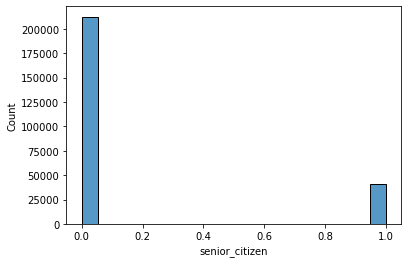

In [6]:
sns.histplot(data=telco.senior_citizen)

In [12]:
telco.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,internet_service_type_id,contract_type_id,payment_type_id
count,253548.000000,253548.000000,253548.000000,253548.000000,253548.000000,253548.000000,253548.000000,253548.000000,253548.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,2.000000,2.000000,2.500000
std,0.368586,24.557786,0.737745,0.833698,1.148828,30.087970,0.816498,0.816498,1.118036
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.750000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,2.000000,2.000000,2.500000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,3.000000,3.000000,3.250000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [40]:
#Make a list of all the columns
cols = telco.columns.to_list()
cols

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'internet_service_type_id',
 'internet_service_type',
 'contract_type_id',
 'contract_type',
 'payment_type_id',
 'payment_type']

In [42]:
#List of all numeric columns 
telco.select_dtypes(include='int64').columns.to_list()

['senior_citizen',
 'tenure',
 'internet_service_type_id',
 'contract_type_id',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'payment_type_id']

In [43]:
#Range for all numeic columns
telco_numeric_columns = telco.select_dtypes(include=[np.number])
df_column_range = telco_numeric_columns.max() - telco_numeric_columns.min()
df_column_range

senior_citizen                1.0
tenure                       72.0
internet_service_type_id      2.0
contract_type_id              2.0
payment_type_id               3.0
monthly_charges             100.5
internet_service_type_id      2.0
contract_type_id              2.0
payment_type_id               3.0
dtype: float64

In [46]:
#List of all non numeric columns 
telco.select_dtypes(include='object').columns.to_list()

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

### Takeaways:
- tenure and monthly charges are the only continuous variables
- duplicate columns exist and will need to be handled

In [123]:
telco.internet_service_type.value_counts()

None           84516
DSL            84516
Fiber optic    84516
Name: internet_service_type, dtype: int64

### Steps for Prepare:
- Replace all Yes and No values with 0, 1
- Encode gender, internet_service_type, contract_type, payment_type
- Drop  gender, internet_service_type, internet_service_type_id, contract_type_id, payment_type_id 
- Replace No phone service with No
- Replace No Internet Service with No
- Deal with missing values in total charges - Create a function for this

In [136]:
telco.replace({'No internet service': 'No', 'No phone service':'No'}, inplace=True)

In [137]:
telco.replace({'Yes': 1, 'No': 0}, inplace=True)

In [138]:
cols_to_drop = ['internet_service_type_id', 'contract_type_id', 'payment_type_id']
telco.drop(columns=cols_to_drop, inplace=True)

In [58]:
telco.select_dtypes(include='object').columns.to_list()

['customer_id',
 'gender',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'total_charges',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [139]:
cols_to_encode = ['gender', 'contract_type', 'payment_type' ]

In [140]:
dummies = pd.get_dummies(telco[cols_to_encode], drop_first=[True])

In [141]:
dummies

,gender_Male,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,1,0,0,1,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
253543,1,1,0,1,0,0
253544,1,1,0,1,0,0
253545,1,0,1,1,0,0
253546,1,0,1,1,0,0


In [142]:
telco = pd.concat([telco, dummies], axis=1)

In [143]:
telco.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,contract_type_id.1,contract_type,payment_type_id.1,payment_type,gender_Male,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0002-ORFBO,Female,0,1,1,9,1,0,0,...,1,Month-to-month,1,Electronic check,0,0,0,0,1,0
1,1,0002-ORFBO,Female,0,1,1,9,1,0,0,...,1,Month-to-month,1,Electronic check,0,0,0,0,1,0
2,2,0002-ORFBO,Female,0,1,1,9,1,0,0,...,1,Month-to-month,1,Electronic check,0,0,0,0,1,0
3,3,0002-ORFBO,Female,0,1,1,9,1,0,0,...,2,One year,1,Electronic check,0,1,0,0,1,0
4,4,0002-ORFBO,Female,0,1,1,9,1,0,0,...,2,One year,1,Electronic check,0,1,0,0,1,0


In [144]:
telco.drop(columns={'gender','internet_service_type', 'contract_type', 'payment_type'}, inplace=True)

In [145]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253548 entries, 0 to 253547
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            253548 non-null  int64  
 1   customer_id                           253548 non-null  object 
 2   senior_citizen                        253548 non-null  int64  
 3   partner                               253548 non-null  int64  
 4   dependents                            253548 non-null  int64  
 5   tenure                                253548 non-null  int64  
 6   phone_service                         253548 non-null  int64  
 7   multiple_lines                        253548 non-null  int64  
 8   online_security                       253548 non-null  int64  
 9   online_backup                         253548 non-null  int64  
 10  device_protection                     253548 non-null  int64  
 11  

### Questions:
- Are there really no nulls in this dataframe?
- Why is the dtype for total_charges an object?
- Should reset index to be customer_id..if all ids are unique

In [76]:
#Are all the customers ids unique? 
telco['customer_id'].nunique()

7043

In [146]:
#Drop customer id
telco.drop(columns='customer_id', inplace=True)

In [97]:
telco.total_charges.astype('float64', errors='raise')

ValueError: could not convert string to float: ''

In [155]:
#Telco total charges with missing values are all related to the fact that tenure is less than 1 month - so total charges are 0
telco.tenure[telco.total_charges == ' '].nunique()

1

In [163]:
#fill those values
telco.total_charges = telco.total_charges.replace(' ', 0.0)

In [164]:
#Convert total_charges to float
telco.total_charges = telco.total_charges.astype('float64', errors='raise')

In [165]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253548 entries, 0 to 253547
Data columns (total 26 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            253548 non-null  int64  
 1   senior_citizen                        253548 non-null  int64  
 2   partner                               253548 non-null  int64  
 3   dependents                            253548 non-null  int64  
 4   tenure                                253548 non-null  int64  
 5   phone_service                         253548 non-null  int64  
 6   multiple_lines                        253548 non-null  int64  
 7   online_security                       253548 non-null  int64  
 8   online_backup                         253548 non-null  int64  
 9   device_protection                     253548 non-null  int64  
 10  tech_support                          253548 non-null  int64  
 11  

In [156]:
#telco.multiple_lines.astype('float64', errors='raise')

In [157]:
#replace "no phone service" with 0 
#telco.phone_service = telco.phone_service.replace('No phone service ', 0)

In [158]:
#telco.phone_service.astype('int64', errors='raise')

In [159]:
#telco.multiple_lines = telco.multiple_lines.replace('No phone service', 0)

In [160]:
#telco.multiple_lines = telco.multiple_lines.astype('int64', errors='raise')

In [161]:
#telco.info()

In [119]:
#def clean_feature_columns(col):
#    for n in col:
#        if n != 1:
#            n == 0
#    return n

In [122]:
#telco.online_security = clean_feature_columns(telco.online_security)

1

## Testing Different Encoding Method

In [26]:
telco = get_telco_data()

In [27]:
def prep_data(df):
    '''
    This function takes in the telco data frame and prepares it for analysis by:


    '''
    #Convert strings in features that do not match "yes" or "no"
    df.replace({'No internet service': 'No', 'No phone service':'No'}, inplace=True)

    #Convert features with yes or no to 0s and 1s
    df.replace({'Yes': 1, 'No': 0}, inplace=True)

    #Columns to encode
    cols_to_encode = ['gender']

    #Encode
    dummies = pd.get_dummies(df[cols_to_encode], drop_first=[True])

    #Concat dummies to original df
    df = pd.concat([df, dummies], axis=1)

    #Columns to drop
    cols_to_drop = ['contract_type', 'payment_type', 'internet_service_type', 
    'gender','customer_id']

    #drop columns
    df.drop(columns=cols_to_drop, inplace=True)

    #Fill empty values in total_charges column where tenure is less than 1 month
    df.total_charges = df.total_charges.replace(' ', 0.0)

    #Convert total_charges to float
    df.total_charges = df.total_charges.astype('float64')

    #Replace 0s in total charges with monthly charge
    df.total_charges = np.where(df.total_charges==0.0, df.monthly_charges , df.total_charges)

    return df


In [28]:
telco = prep_data(telco)

In [29]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   int64  
 5   dependents                7043 non-null   int64  
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   int64  
 8   multiple_lines            7043 non-null   int64  
 9   online_security           7043 non-null   int64  
 10  online_backup             7043 non-null   int64  
 11  device_protection         7043 non-null   int64  
 12  tech_support              7043 non-null   int64  
 13  streaming_tv              7043 non-null   int64  
 14  streamin

In [30]:
telco.head()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,gender_Male
0,2,1,1,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.40,0,1
1,4,1,1,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,0
2,1,1,1,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,0
3,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,25.1,25.10,1,1
4,3,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,30.5,30.50,1,0


In [31]:
telco.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,gender_Male
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.798992,0.265370,0.504756
std,1.148907,0.833755,0.737796,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.730170,0.441561,0.500013
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000,1.000000
75%,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000
max,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000


In [32]:
cat_vars = ['churn', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines','online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'paperless_billing',
       'internet_service_type_id','gender_Male', 'contract_type_id', 
       'payment_type_id']
quant_vars = ['tenure', 'monthly_charges', 'total_charges']

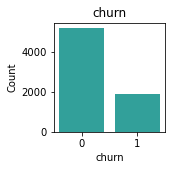

   churn  Count  Percent
0      0   5174    73.46
1      1   1869    26.54
_________________________________________________________________


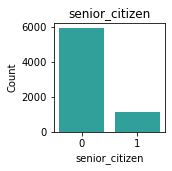

   senior_citizen  Count  Percent
0               0   5901    83.79
1               1   1142    16.21
_________________________________________________________________


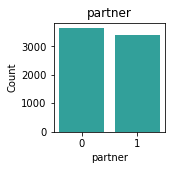

   partner  Count  Percent
0        0   3641     51.7
1        1   3402     48.3
_________________________________________________________________


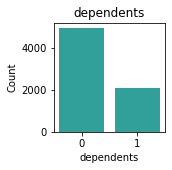

   dependents  Count  Percent
0           0   4933    70.04
1           1   2110    29.96
_________________________________________________________________


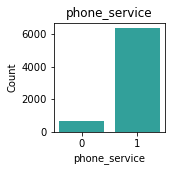

   phone_service  Count  Percent
1              1   6361    90.32
0              0    682     9.68
_________________________________________________________________


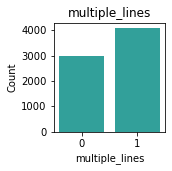

   multiple_lines  Count  Percent
0               1   4072    57.82
1               0   2971    42.18
_________________________________________________________________


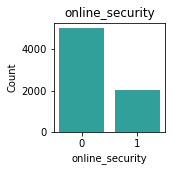

   online_security  Count  Percent
0                0   5024    71.33
1                1   2019    28.67
_________________________________________________________________


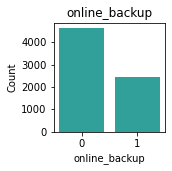

   online_backup  Count  Percent
0              0   4614    65.51
1              1   2429    34.49
_________________________________________________________________


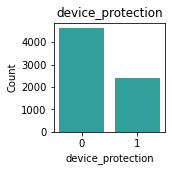

   device_protection  Count  Percent
0                  0   4621    65.61
1                  1   2422    34.39
_________________________________________________________________


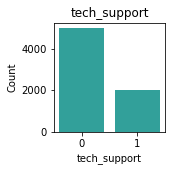

   tech_support  Count  Percent
0             0   4999    70.98
1             1   2044    29.02
_________________________________________________________________


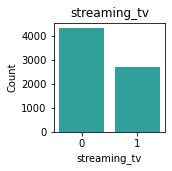

   streaming_tv  Count  Percent
0             0   4336    61.56
1             1   2707    38.44
_________________________________________________________________


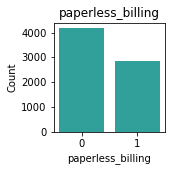

   paperless_billing  Count  Percent
1                  0   4171    59.22
0                  1   2872    40.78
_________________________________________________________________


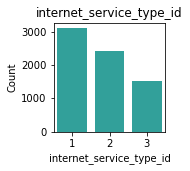

   internet_service_type_id  Count  Percent
2                         1   3096    43.96
1                         2   2421    34.37
3                         3   1526    21.67
_________________________________________________________________


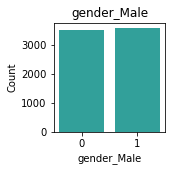

   gender_Male  Count  Percent
1            1   3555    50.48
0            0   3488    49.52
_________________________________________________________________


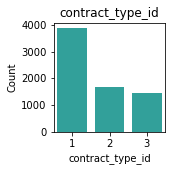

   contract_type_id  Count  Percent
1                 1   3875    55.02
3                 2   1695    24.07
2                 3   1473    20.91
_________________________________________________________________


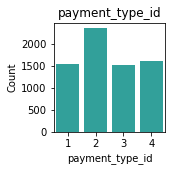

   payment_type_id  Count  Percent
1                2   2365    33.58
2                4   1612    22.89
3                1   1544    21.92
4                3   1522    21.61
_________________________________________________________________


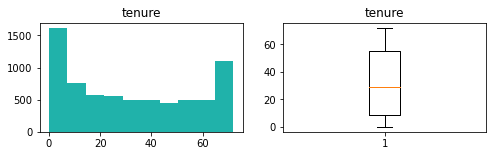

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


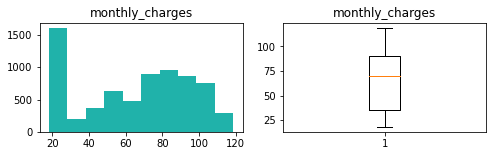

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


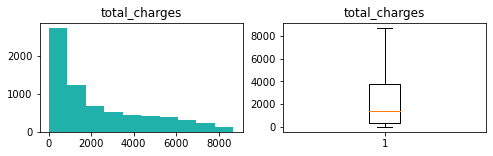

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64


In [35]:
explore.explore_univariate(telco, cat_vars, quant_vars)

In [38]:
#Step 1 is to split the data into my train, validate, and test data frames:
train, validate, test = explore.train_validate_test_split(telco, target='churn', seed=123)

In [39]:
cat_vars = cat_vars[1:]

partner 
_____________________

        chi2       p-value  degrees of freedom
0  59.095958  1.501674e-14                   1

observed:
 churn       0     1   All
partner                  
0        1383   645  2028
1        1514   401  1915
All      2897  1046  3943

expected:
              0           1
0  1490.011666  537.988334
1  1406.988334  508.011666


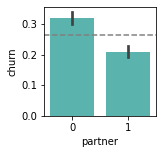


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  104.078831  1.944245e-24                   1

observed:
 churn          0     1   All
dependents                  
0           1887   859  2746
1           1010   187  1197
All         2897  1046  3943

expected:
              0           1
0  2017.540451  728.459549
1   879.459549  317.540451


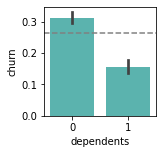


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.031921  0.858201                   1

observed:
 churn             0     1   All
phone_service                  
0               276    97   373
1              2621   949  3570
All            2897  1046  3943

expected:
              0           1
0   274.050469   98.949531
1  2622.949531  947.050469


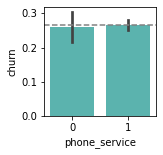


_____________________

multiple_lines 
_____________________

       chi2   p-value  degrees of freedom
0  4.242562  0.039423                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1698   574  2272
1               1199   472  1671
All             2897  1046  3943

expected:
              0           1
0  1669.283287  602.716713
1  1227.716713  443.283287


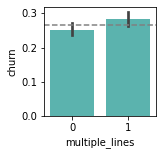


_____________________

online_security 
_____________________

        chi2       p-value  degrees of freedom
0  91.853993  9.331342e-22                   1

observed:
 churn               0     1   All
online_security                  
0                1940   865  2805
1                 957   181  1138
All              2897  1046  3943

expected:
              0           1
0  2060.888917  744.111083
1   836.111083  301.888917


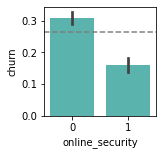


_____________________

online_backup 
_____________________

        chi2   p-value  degrees of freedom
0  20.992487  0.000005                   1

observed:
 churn             0     1   All
online_backup                  
0              1863   755  2618
1              1034   291  1325
All            2897  1046  3943

expected:
              0           1
0  1923.496323  694.503677
1   973.503677  351.496323


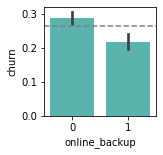


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  17.652315  0.000027                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1865   749  2614
1                  1032   297  1329
All                2897  1046  3943

expected:
              0           1
0  1920.557444  693.442556
1   976.442556  352.557444


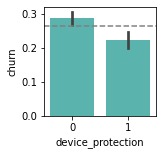


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  111.221776  5.290815e-26                   1

observed:
 churn            0     1   All
tech_support                  
0             1941   881  2822
1              956   165  1121
All           2897  1046  3943

expected:
              0           1
0  2073.379153  748.620847
1   823.620847  297.379153


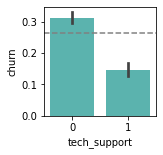


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  17.559103  0.000028                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1854   592  2446
1             1043   454  1497
All           2897  1046  3943

expected:
              0           1
0  1797.124524  648.875476
1  1099.875476  397.124524


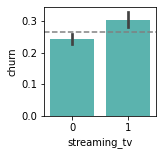


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  142.836865  6.381161e-33                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1359   268  1627
1                  1538   778  2316
All                2897  1046  3943

expected:
              0           1
0  1195.389044  431.610956
1  1701.610956  614.389044


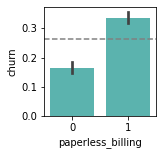


_____________________

internet_service_type_id 
_____________________

         chi2       p-value  degrees of freedom
0  405.080731  1.091031e-88                   2

observed:
 churn                        0     1   All
internet_service_type_id                  
1                         1077   260  1337
2                         1018   725  1743
3                          802    61   863
All                       2897  1046  3943

expected:
              0           1
0   982.320314  354.679686
1  1280.616536  462.383464
2   634.063150  228.936850


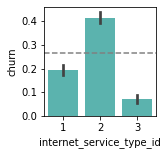


_____________________

gender_Male 
_____________________

       chi2   p-value  degrees of freedom
0  0.927191  0.335594                   1

observed:
 churn           0     1   All
gender_Male                  
0            1473   513  1986
1            1424   533  1957
All          2897  1046  3943

expected:
              0           1
0  1459.153436  526.846564
1  1437.846564  519.153436


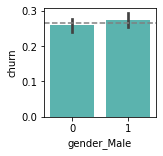


_____________________

contract_type_id 
_____________________

         chi2        p-value  degrees of freedom
0  625.295741  1.654837e-136                   2

observed:
 churn                0     1   All
contract_type_id                  
1                 1269   919  2188
2                  730   103   833
3                  898    24   922
All               2897  1046  3943

expected:
              0           1
0  1607.566827  580.433173
1   612.021557  220.978443
2   677.411616  244.588384


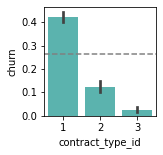


_____________________

payment_type_id 
_____________________

         chi2       p-value  degrees of freedom
0  365.297942  7.261184e-79                   3

observed:
 churn               0     1   All
payment_type_id                  
1                 735   606  1341
2                 738   157   895
3                 699   154   853
4                 725   129   854
All              2897  1046  3943

expected:
             0           1
0  985.259194  355.740806
1  657.574182  237.425818
2  626.715952  226.284048
3  627.450672  226.549328


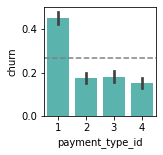


_____________________

tenure 
____________________



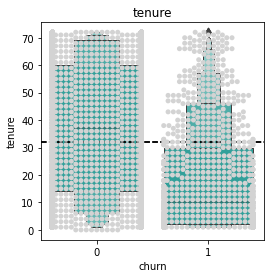

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.021056  24.067195  0.0  14.0  37.0  60.0  72.0
1      1046.0  18.228489  19.391963  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2215778.5, pvalue=2.6225178502743525e-109)

____________________

monthly_charges 
____________________



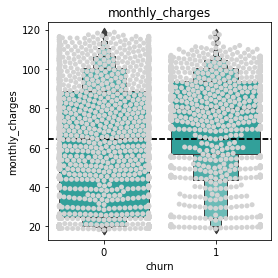

        count       mean        std    min      25%    50%      75%     max
churn                                                                      
0      2897.0  61.176976  31.293724  18.25  25.0500  64.35  88.9500  118.65
1      1046.0  74.376052  24.624883  18.85  56.8125  79.50  94.0375  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1149040.0, pvalue=4.103131725466243e-31)

____________________

total_charges 
____________________



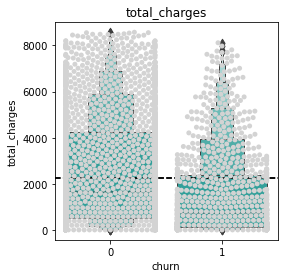

        count         mean          std    min       25%      50%        75%  \
churn                                                                          
0      2897.0  2521.965412  2334.005662  18.80  538.2000  1640.00  4250.1000   
1      1046.0  1538.818499  1856.338676  18.85  139.3625   768.05  2386.1125   

           max  
churn           
0      8564.75  
1      8109.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1944421.5, pvalue=3.84641772859757e-42)

____________________



In [40]:
#Explore the bivariate variables
explore.explore_bivariate(train,'churn', cat_vars, quant_vars)